In [1]:
%load_ext autoreload
%autoreload 2
import sys
if '..' not in sys.path: sys.path.append("..")

# Segmentation and boundary-box regression

In [2]:
from src.utils.preprocess import tensor2numpy, image2axial,mask_threshold, preprocess_image, normalize
from src.utils import preprocess
from src.utils import plot
from src.utils.utils import split_custom_filename
from src.classifier.agent import Agent
from src.cam import CAM_TYPES, CAM
from src import segmentation
import nibabel as nib
import itertools

import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt

In [3]:
from scipy import ndimage

***Defined dataloader:***
Data directory: data/SPM_categorised/Amira/
Dataset sizes - Training: 494 Validation: 62
Seed: 420
Augmentation: Enabled
KFold: Enabled - Fold: 1/9

Loading model from /var/metrics/codetests/logs/tb/resnet50/20210501144041/version_0/checkpoints/epoch=56-step=3533.ckpt (checkpoint)..
Architecture [ResNet] was created
***Defined hyperparameters:***
"arch":                {'name': 'resnet50', 'args': {'num_channels': 1, 'num_classes': 3}}
"checkpoint_path":     None
"class_weights":       tensor([1.1847, 0.9251, 0.9303])
"hp_metrics":          ['loss/train', 'loss/val', 'accuracy/val', 'auc/val', 'specificity/val', 'sensitivity/val']
"loss":                {'type': 'CrossEntropyLoss', 'args': {'weight': True}}
"optimizer":           {'type': 'Adam', 'args': {'lr': 0.0001, 'weight_decay': 1e-06, 'amsgrad': True}}
"roi_hparams":         {'enable': False, 'output_shape': [3, 3, 3], 'boundary_boxes': []}
"weight_distribution": normal


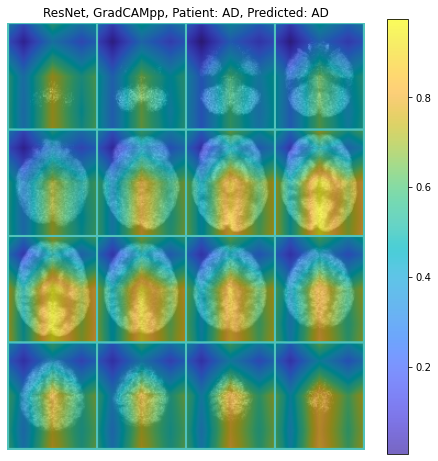

In [171]:
# Load models #resnet18_brew2/20210502200453/version_0/checkpoints/epoch=81-step=5083.ckpt
trainer = Agent('resnet18_brew2', checkpoint_path="/var/metrics/codetests/logs/tb/resnet50/20210501144041/version_0/checkpoints/epoch=56-step=3533.ckpt")
trainer.load_model()
#trainer.run()
model = trainer.model
dataset = trainer.dataloader
cam_extractor = CAM(CAM_TYPES.GradCAMpp.value, model)

# Load example image
filename= '../data/SPM_categorised/AIH/AD/AD_ADNI_2489.nii'
#filename = '../data/SPM_categorised/AIH/CN/CN_ADNI_0442.nii'
#filename = '../data/SPM_categorised/AIH/AD/AD_ADNI_2526.nii'
class_label = split_custom_filename(filename,'/')[4]
test_image = image2axial(nib.load(filename).get_fdata())
test_image[test_image <= 0]=0
test_image = preprocess_image(test_image)


class_scores, class_idx = cam_extractor.evaluate(test_image)
grid_image, grid_mask = cam_extractor.grid_class(class_scores, [0,1,2], test_image,pad_value=0.5, max_num_slices=16, nrow=4)
masked_image = preprocess_image(cam_extractor.activation_map(class_idx, class_scores))
cam_extractor.plot(class_scores, [2],test_image, max_num_slices=16, class_label=class_label,nrow=4);

***Defined dataloader:***
Data directory: data/SPM_categorised/Amira/
Dataset sizes - Training: 494 Validation: 62
Seed: 420
Augmentation: Enabled
KFold: Enabled - Fold: 1/9

Loading model from /var/metrics/codetests/logs/tb/resnet18_brew2/20210503020158/version_1/checkpoints/epoch=113-step=7067.ckpt (checkpoint)..
Architecture [ResNet] was created
***Defined hyperparameters:***
"arch":                {'name': 'resnet18_brew2', 'args': {'num_channels': 1, 'num_classes': 3}}
"checkpoint_path":     None
"class_weights":       tensor([1.1847, 0.9251, 0.9303])
"hp_metrics":          ['loss/train', 'loss/val', 'accuracy/val', 'auc/val', 'specificity/val', 'sensitivity/val']
"loss":                {'type': 'CrossEntropyLoss', 'args': {'weight': True}}
"optimizer":           {'type': 'Adam', 'args': {'lr': 0.0001, 'weight_decay': 0, 'amsgrad': True}}
"roi_hparams":         {'enable': False, 'output_shape': [3, 3, 3], 'boundary_boxes': []}
"weight_distribution": normal


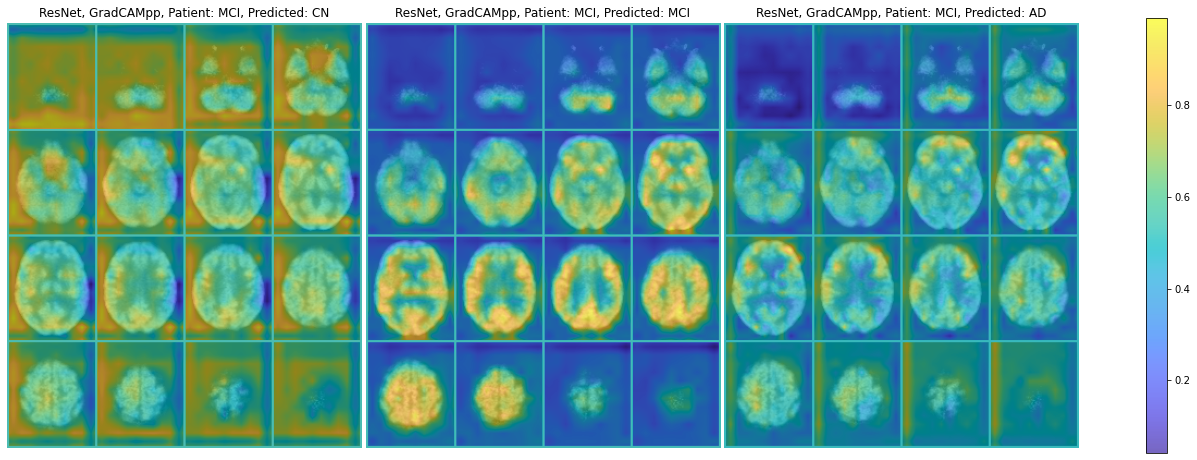

In [4]:
# Load models #resnet18_brew2/20210502200453/version_0/checkpoints/epoch=81-step=5083.ckpt
trainer = Agent('resnet18_brew2', checkpoint_path="/var/metrics/codetests/logs/tb/resnet18_brew2/20210503020158/version_1/checkpoints/epoch=113-step=7067.ckpt")
trainer.load_model()
#trainer.run()
model = trainer.model
dataset = trainer.dataloader
cam_extractor = CAM(CAM_TYPES.GradCAMpp.value, model)

# Load example image
#filename= '../data/SPM_categorised/AIH/AD/AD_ADNI_2489.nii'
#filename = '../data/SPM_categorised/AIH/CN/CN_ADNI_0442.nii'
filename = '../data/SPM_categorised/AIH/MCI/MCI_ADNI_1389.nii'
class_label = split_custom_filename(filename,'/')[4]
test_image = image2axial(nib.load(filename).get_fdata())
test_image[test_image <= 0]=0
test_image = preprocess_image(test_image)


class_scores, class_idx = cam_extractor.evaluate(test_image)
grid_image, grid_mask = cam_extractor.grid_class(class_scores, [0,1,2], test_image,pad_value=0.5, max_num_slices=16, nrow=4)
masked_image = preprocess_image(cam_extractor.activation_map(class_idx, class_scores))
cam_extractor.plot(class_scores, [0,1,2],test_image, max_num_slices=16, class_label=class_label,nrow=4);

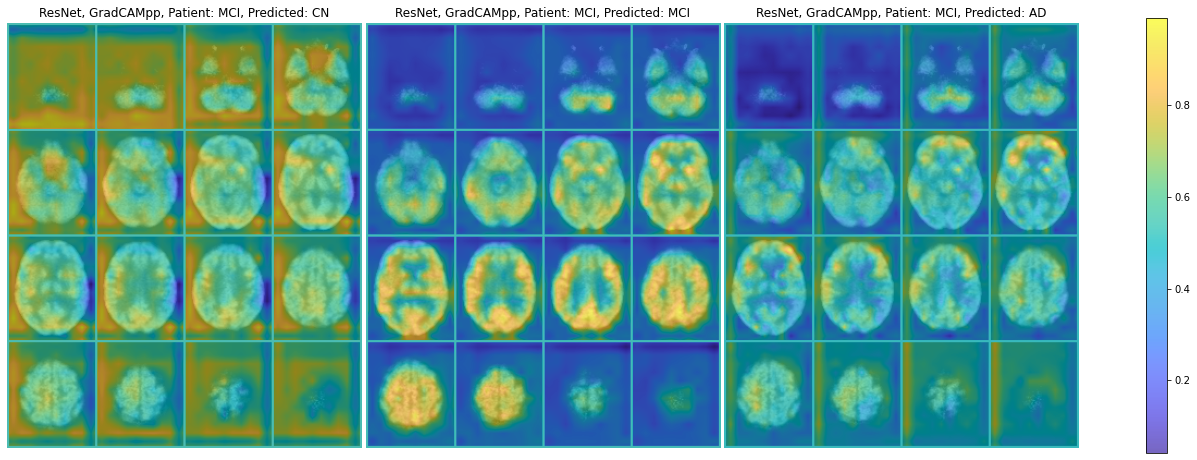

In [5]:
class_scores, class_idx = cam_extractor.evaluate(test_image)
grid_image, grid_mask = cam_extractor.grid_class(class_scores, [0,1,2], test_image,pad_value=0.5, max_num_slices=16, nrow=4)
masked_image = preprocess_image(cam_extractor.activation_map(class_idx, class_scores))
cam_extractor.plot(class_scores, [0,1,2],test_image, max_num_slices=16, class_label=class_label,nrow=4);

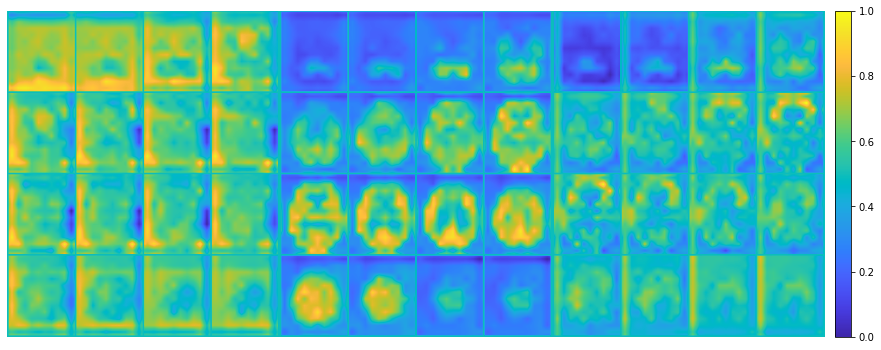

In [6]:
from src.utils.plot import imshow
imshow(preprocess_image(grid_mask, input_shape=grid_image.shape), colormap=True,colormap_shrink=1, figsize=(18,6))

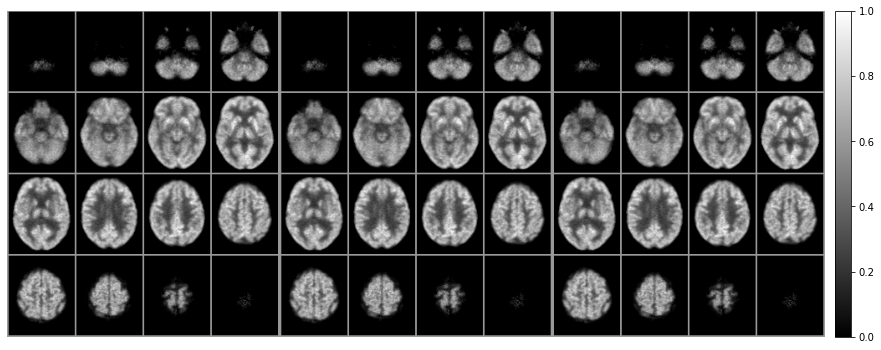

In [7]:

imshow(preprocess_image(grid_image, input_shape=grid_image.shape),cmap='gray', colormap=True,colormap_shrink=1, figsize=(18,6))

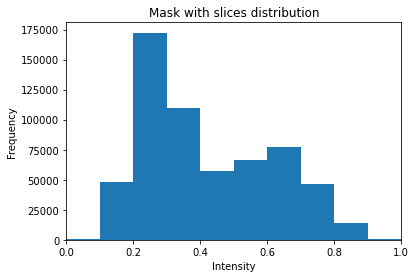

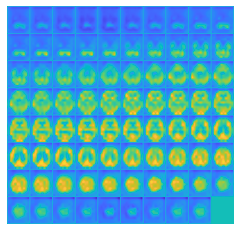

In [8]:
# Only check the distribution from each image! This looks a lot better!
sliced_masks = preprocess_image(cam_extractor.activation_map(1, class_scores))

# Remove background since this give faulty ideas otherwise
#sliced_masks[test_image == 0] = 0
#segmentation.intensity_distribution(sliced_masks[30].flatten(),title="Mask with slices distribution")
plot.intensity_distribution(sliced_masks.ravel(),title="Mask with slices distribution")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

plot.imshow(preprocess.to_grid(sliced_masks))

# Extract Segmentation and boundary boxes

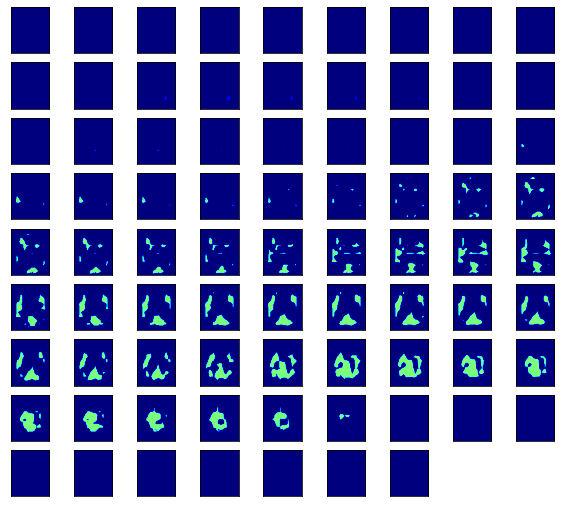

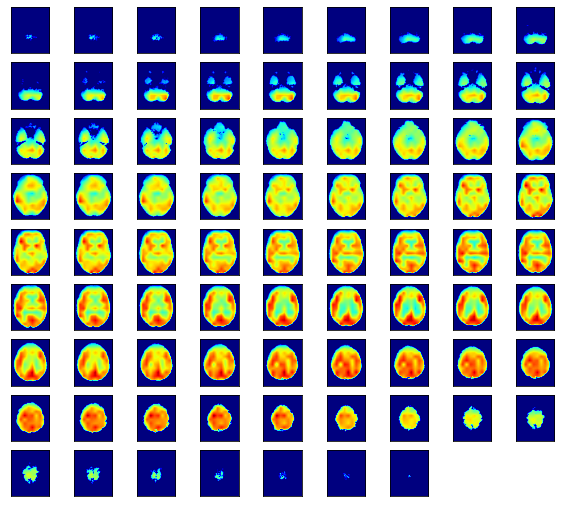

In [9]:
#features = segmentation.sequential_processing(test_image.copy(), sliced_masks.copy())
inner = segmentation.feature_extraction(cam_extractor, upper_bound=0.95,lower_bound=0.8,func='extract')
tmp_segmented = inner(torch.from_numpy(test_image),1)
plot.display_3D(tmp_segmented[0],step=1);
plot.display_3D(tmp_segmented[1],step=1);


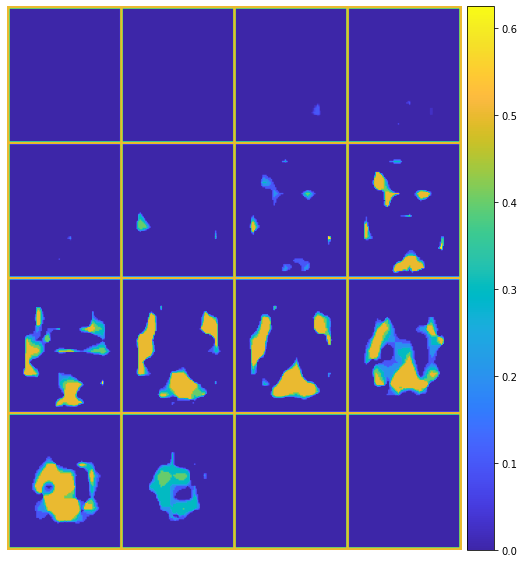

In [10]:
from src.utils.preprocess import to_grid
imshow(to_grid(tmp_segmented[0],max_num_slices=16, nrow=4), colormap=True, figsize=(10,10))

In [11]:
inner = segmentation.feature_extraction(cam_extractor, upper_bound=0.8,lower_bound=0.5,func='features')
features = inner((1,"Something", torch.from_numpy(test_image), 0,1))
features

{'image': 'Something',
 'patient_class': 0,
 'observe_class': 1,
 'probability_class': 1,
 'bbox_area': [351616],
 'mean_intensity': [181.9804382892638],
 'bbox': [(8, 10, 75, 92, 9, 73)],
 'upper_bound': 159.0,
 'lower_bound': 90.0,
 'use_quantile_bounds': True,
 'score': array([0.12892657])}

# RoIAlign

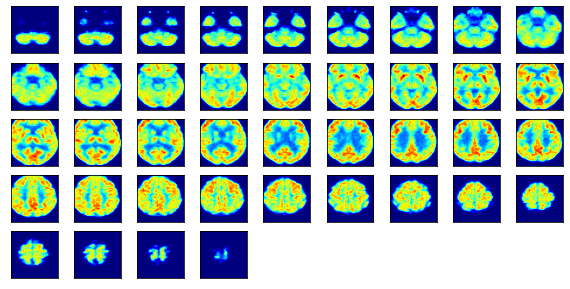

In [13]:
tmp_roialign = segmentation.roi_align(test_image, features['bbox'], displayed=True)
#imshow(to_grid(tensor2numpy(tmp_roialign[0][0]),max_num_slices=16, nrow=5), colormap=True)

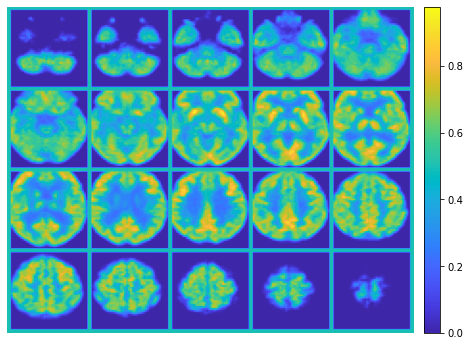

In [14]:
imshow(to_grid(tensor2numpy(tmp_roialign[0][0]),max_num_slices=25, nrow=5), colormap=True, figsize=(18,6))

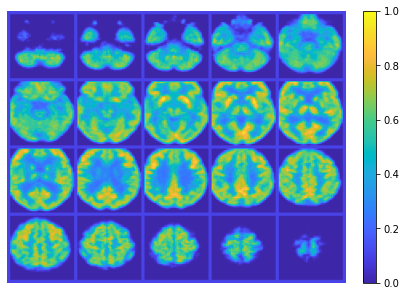

In [15]:
imshow(to_grid(np.stack([to_grid(tensor2numpy(x[0]),max_num_slices=25, nrow=5,pad_value=0.1) for x in tmp_roialign]), pad_value=0.5), colormap=True, figsize=(30,5))

In [17]:
#imshow(to_grid(test_image,max_num_slices=25, nrow=5),cmap='gray', colormap=True,colormap_shrink=1, figsize=(18,6))
#imshow(to_grid(sliced_masks,max_num_slices=25, nrow=5), colormap=True,colormap_shrink=1, figsize=(18,6))
#imshow(to_grid(tmp_segmented[0],max_num_slices=25, nrow=5), colormap=True, figsize=(18,6))
#[imshow(to_grid(np.stack([to_grid(tensor2numpy(x[0]),max_num_slices=25, nrow=5), colormap=True, figsize=(18,6)]))) for x in tmp_roialign]

## Extract all regions

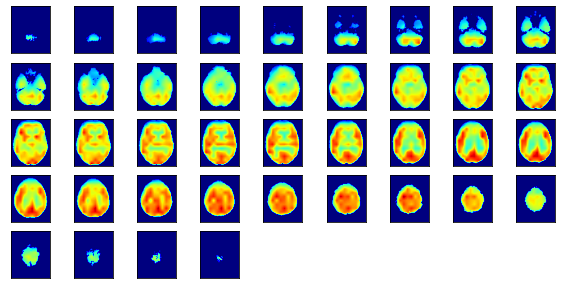

In [18]:
from src.utils.preprocess import to_grid
tmp_slices = sliced_masks.copy()
tmp_slices[test_image == 0] = 0
plot.display_3D(tmp_slices);

In [19]:
import pandas as pd
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
from src.utils.utils import create_directory
import os

CALCULATE_BBOX = True
BBOX_FILENAME = r'../logs/bbox/resnet50/bbox_2021-04-22 17:08:06.333885.csv'

if CALCULATE_BBOX:

    
    fileset = dataset.val_dataloader().dataset

    content = itertools.product(enumerate(fileset),[0,1,2])
    extraction_method = segmentation.feature_extraction(cam_extractor, upper_bound=0.95,lower_bound=0.5,)

    with ThreadPoolExecutor(max_workers=10) as executor:
        results = executor.map(extraction_method,((i, fileset.data[i].rsplit("/",1)[1],image, patient_class, observe_class) for (i, (image, patient_class)), observe_class in content))
    #derp = [extraction_method((i, fileset.data[i].rsplit("/",1)[1], image, patient_class, observe_class)) for (i, (image, patient_class)), observe_class in content]
    bboxes_dict = list(results)
    # Convert data to dataframe
    
    bboxes_df = pd.DataFrame(bboxes_dict)
    bboxes_df.rename(columns = {'index' : 'image', 'bbox':'bbox'}, inplace = True)
    bboxes_df['bbox_count'] = bboxes_df['bbox'].str.len()
    bboxes_df = bboxes_df[bboxes_df['bbox_count']>0]
    bboxes_df = bboxes_df.apply(pd.Series.explode)
    bboxes_df['bbox'] = bboxes_df['bbox'].apply(lambda row: list(row))
    
    bboxes_df.reset_index(inplace = True)
    bboxes_df.rename(columns = {'index' : 'Image_class'}, inplace = True)
    bboxes_df.head(20)

    # Sort data
    bboxes_df.sort_values('score',ascending=False,inplace=True)
    
    # Save to logs
    
    now = datetime.now()
    name = f"../logs/bbox/{model._hparams['arch']['name']}/bbox_{now}.csv"
    os.makedirs(f"../logs/bbox/{model._hparams['arch']['name']}", exist_ok=True)
    bboxes_df.to_csv(name,index=False,header=True)

else:
    bboxes_df = pd.read_csv(BBOX_FILENAME, dtype={'patient_class':int, 'observe_class':int,'probability_class':int,'bbox_count':int})
    bboxes_df['bbox'] = segmentation.column_to_np(segmentation.column_to_tuple(bboxes_df['bbox']))

In [20]:
bboxes_df.head(40)

Image_class              image  patient_class  observe_class  \
3827          162   CN_ADNI_0463.nii              0              0   
3825          162   CN_ADNI_0463.nii              0              0   
3823          162   CN_ADNI_0463.nii              0              0   
3816          162   CN_ADNI_0463.nii              0              0   
3822          162   CN_ADNI_0463.nii              0              0   
3821          162   CN_ADNI_0463.nii              0              0   
3818          162   CN_ADNI_0463.nii              0              0   
3826          162   CN_ADNI_0463.nii              0              0   
3820          162   CN_ADNI_0463.nii              0              0   
3819          162   CN_ADNI_0463.nii              0              0   
3815          162   CN_ADNI_0463.nii              0              0   
3817          162   CN_ADNI_0463.nii              0              0   
3828          162   CN_ADNI_0463.nii              0              0   
3824          162   CN_ADNI_0463.nii              0              0   
1992           93  MCI_ADNI_2980.nii              1              0   
1975           93  MCI_ADNI_2980.nii              1              0   
1972           93  MCI_ADNI_2980.nii              1              0   
1987           93  MCI_ADNI_2980.nii              1              0   
1986           93  MCI_ADNI_2980.nii              1              0   
1985           93  MCI_ADNI_2980.nii              1              0   
1983           93  MCI_ADNI_2980.nii              1              0   
1982           93  MCI_ADNI_2980.nii              1              0   
1979           93  MCI_ADNI_2980.nii              1              0   
1978           93  MCI_ADNI_2980.nii              1              0   
1974           93  MCI_ADNI_2980.nii              1              0   
1991           93  MCI_ADNI_2980.nii              1              0   
1980           93  MCI_ADNI_2980.nii              1              0   
1970           93  MCI_ADNI_2980.nii              1              0   
1977           93  MCI_ADNI_2980.nii              1              0   
1973           93  MCI_ADNI_2980.nii              1              0   
1969           93  MCI_ADNI_2980.nii              1              0   
1967           93  MCI_ADNI_2980.nii              1              0   
1981           93  MCI_ADNI_2980.nii              1              0   
1993           93  MCI_ADNI_2980.nii              1              0   
1990           93  MCI_ADNI_2980.nii              1              0   
1971           93  MCI_ADNI_2980.nii              1              0   
1968           93  MCI_ADNI_2980.nii              1              0   
1988           93  MCI_ADNI_2980.nii              1              0   
1976           93  MCI_ADNI_2980.nii              1              0   
1989           93  MCI_ADNI_2980.nii              1              0   

      probability_class bbox_area mean_intensity                      bbox  \
3827                  1         1          197.0  [49, 52, 50, 53, 50, 51]   
3825                  1         1          199.0  [27, 67, 28, 68, 44, 45]   
3823                  1         1          199.0  [35, 28, 36, 29, 35, 36]   
3816                  1         3          198.0  [43, 51, 46, 52, 11, 12]   
3822                  1         4          197.0    [6, 51, 7, 53, 27, 29]   
3821                  1         4     197.666667  [42, 43, 44, 44, 27, 29]   
3818                  1         9     198.666667  [45, 80, 46, 83, 12, 15]   
3826                  1        18     201.571429  [52, 50, 55, 53, 49, 51]   
3820                  1        24     201.333333  [25, 49, 28, 53, 20, 22]   
3819                  1        36        198.125  [43, 73, 46, 76, 19, 23]   
3815                  1        45     198.608696  [50, 33, 53, 38, 10, 13]   
3817                  1        54     197.833333  [47, 80, 56, 82, 11, 14]   
3828                  1        72     201.833333  [50, 50, 53, 56, 51, 55]   
3824                  1       120     198.1

# Check distributions for validating clusters

<AxesSubplot:>

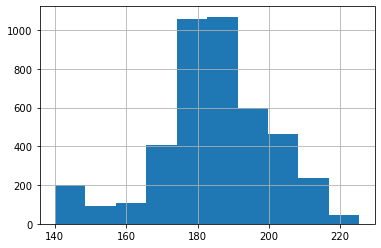

In [21]:
bboxes_df.mean_intensity.hist() # x: snitt intensitet, y: Frekvens

<AxesSubplot:>

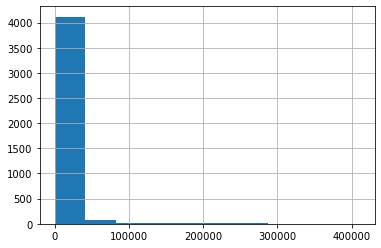

In [22]:
bboxes_df.bbox_area.hist() # x:storlek i pixlar, y: Frekvens

In [23]:
def plot_bbox_category_scatter(bboxes_df, upper_limit=None, lower_limit=None):
    _bboxes_df = bboxes_df.copy()
    if upper_limit:
        _bboxes_df = _bboxes_df.loc[_bboxes_df['bbox_area']<=upper_limit]
    if lower_limit:
        _bboxes_df = _bboxes_df.loc[_bboxes_df['bbox_area']>=lower_limit]
    
    cn_bboxes = _bboxes_df.loc[(bboxes_df['observe_class'] == 0) & (_bboxes_df['patient_class'] == 0) ]
    mci_bboxes = _bboxes_df.loc[(bboxes_df['observe_class'] == 1) & (_bboxes_df['patient_class'] == 1)]
    ad_bboxes = _bboxes_df.loc[(bboxes_df['observe_class'] == 2) & (_bboxes_df['patient_class'] == 2)]

    fig = plt.figure()
    plt.title("Relation between area and intensity")
    plt.xlabel("Intensity")
    plt.ylabel("Area")
    plt.scatter(cn_bboxes.mean_intensity,cn_bboxes.bbox_area,color='blue',label='CN',alpha=0.5)
    plt.scatter(mci_bboxes.mean_intensity,mci_bboxes.bbox_area,color='green',label='MCI',alpha=0.5)
    plt.scatter(ad_bboxes.mean_intensity,ad_bboxes.bbox_area,color='purple',label='AD',alpha=0.5)
    #plt.plot((100,240),(0,400000), color='red')
    plt.legend(loc='upper left')
    plt.show()
    return cn_bboxes,mci_bboxes,ad_bboxes

In [24]:
bboxes_df.loc[(bboxes_df['bbox_area'] > 20000) & (bboxes_df['bbox_area'] < 170000)]

Image_class              image  patient_class  observe_class  \
1048           44   AD_ADNI_2439.nii              2              2   
1416           61   AD_ADNI_2544.nii              2              1   
419            13   AD_ADNI_2467.nii              2              1   
430            14   AD_ADNI_2467.nii              2              2   
1495           69  MCI_ADNI_1534.nii              1              0   
...           ...                ...            ...            ...   
1707           80  MCI_ADNI_1767.nii              1              2   
3380          146   CN_ADNI_0525.nii              0              2   
2728          121  MCI_ADNI_2257.nii              1              1   
1765           83  MCI_ADNI_2343.nii              1              2   
3006          131  MCI_ADNI_2395.nii              1              2   

      probability_class bbox_area mean_intensity                      bbox  \
1048                  1     45815     207.734166   [0, 27, 17, 82, 15, 64]   
1416                  1     30294     205.997472   [11, 63, 38, 85, 8, 59]   
419                   1     36482     208.894874   [4, 56, 38, 85, 14, 51]   
430                   1     36482     208.894874   [4, 56, 38, 85, 14, 51]   
1495                  1     27993     206.586753   [29, 74, 72, 95, 0, 31]   
...                 ...       ...            ...                       ...   
1707                  1    134676     166.364566  [11, 12, 69, 66, 11, 54]   
3380                  1    161336     175.862729    [3, 6, 70, 62, 18, 61]   
2728                  1    143960     173.309913   [39, 32, 79, 93, 9, 68]   
1765                  1    153120     166.749569   [11, 8, 69, 68, 10, 54]   
3006                  1    157194     165.773607   [15, 9, 69, 80, 25, 66]   

      upper_bound  lower_bound  use_quantile_bounds     score  bbox_count  
1048        203.0        152.0                 True  0.828864          36  
1416        196.0        154.0                 True  0.802833          26  
419         200.0        156.0                 True  0.798771          11  
430         200.0        156.0                 True  0.798771          11  
1495        196.0        154.0                 True  0.760997          44  
...           ...          ...                  ...       ...         ...  
1707        155.0         80.0                 True  0.402834          17  
3380        162.0        111.0                 True  0.376874          25  
2728        151.0        104.0                 True  0.370425          18  
1765        155.0         80.0                 True  0.369135          23  
3006        153.0         78.0                 True  0.359216          36  

[190 rows x 13 columns]

# Plot relation between area and intensity

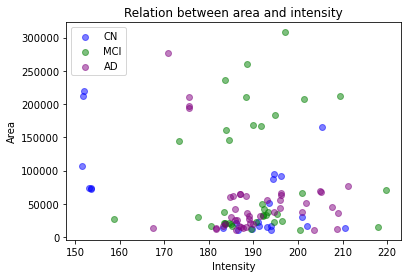

In [25]:
cn_bboxes, mci_bboxes, ad_bboxes = plot_bbox_category_scatter(bboxes_df, lower_limit=10000)

# Plot suggested bounding boxes for each class

In [26]:
# show df for AD
ad_bboxes

Image_class             image  patient_class  observe_class  \
1047           44  AD_ADNI_2439.nii              2              2   
1048           44  AD_ADNI_2439.nii              2              2   
479            17  AD_ADNI_2653.nii              2              2   
1487           68  AD_ADNI_2665.nii              2              2   
430            14  AD_ADNI_2467.nii              2              2   
482            17  AD_ADNI_2653.nii              2              2   
588            23  AD_ADNI_2452.nii              2              2   
95              2  AD_ADNI_2565.nii              2              2   
88              2  AD_ADNI_2565.nii              2              2   
282             8  AD_ADNI_2769.nii              2              2   
1403           59  AD_ADNI_2549.nii              2              2   
267             8  AD_ADNI_2769.nii              2              2   
197             5  AD_ADNI_2888.nii              2              2   
725            29  AD_ADNI_2442.nii              2              2   
74              2  AD_ADNI_2565.nii              2              2   
830            35  AD_ADNI_2643.nii              2              2   
951            41  AD_ADNI_2498.nii              2              2   
75              2  AD_ADNI_2565.nii              2              2   
275             8  AD_ADNI_2769.nii              2              2   
189             5  AD_ADNI_2888.nii              2              2   
646            26  AD_ADNI_2482.nii              2              2   
266             8  AD_ADNI_2769.nii              2              2   
844            35  AD_ADNI_2643.nii              2              2   
1270           53  AD_ADNI_2658.nii              2              2   
1390           59  AD_ADNI_2549.nii              2              2   
783            32  AD_ADNI_2621.nii              2              2   
705            29  AD_ADNI_2442.nii              2              2   
593            23  AD_ADNI_2452.nii              2              2   
1227           50  AD_ADNI_2510.nii              2              2   
1468           65  AD_ADNI_2836.nii              2              2   
767            32  AD_ADNI_2621.nii              2              2   
1360           56  AD_ADNI_2495.nii              2              2   
641            26  AD_ADNI_2482.nii              2              2   
1467           65  AD_ADNI_2836.nii              2              2   
77              2  AD_ADNI_2565.nii              2              2   
181             5  AD_ADNI_2888.nii              2              2   
268             8  AD_ADNI_2769.nii              2              2   
182             5  AD_ADNI_2888.nii              2              2   
386            11  AD_ADNI_2781.nii              2              2   
1359           56  AD_ADNI_2495.nii              2              2   
1264           53  AD_ADNI_2658.nii              2              2   
1165           47  AD_ADNI_2659.nii              2              2   
1222           50  AD_ADNI_2510.nii              2              2   
369            11  AD_ADNI_2781.nii              2              2   

      probability_class bbox_area mean_intensity                      bbox  \
1047                  1     11718      208.84334  [34, 48, 55, 79, 14, 32]   
1048                  1     45815     207.734166   [0, 27, 17, 82, 15, 64]   
479                   1     10656     203.633383  [17, 29, 54, 45, 11, 29]   
1487                  1     19800     183.660721    [0, 17, 9, 61, 16, 66]   
430                   1     36482     208.894874   [4, 56, 38, 85, 14, 51]   
482                   1     76140     211.253715   [0, 39, 36, 86, 15, 60]   
588                   1     19380     189.888982   [0, 23, 15, 61, 20, 54]   
95                    1     10948     186.143381  [42, 45, 65, 73, 49, 66]   
88                    1     15876     186.745686  [21, 24, 48, 52, 37, 58]   
282                   1     14175     187.573248  [21, 24, 48, 49, 37, 58]   
1403                  1     13572     181.

In [27]:
# show df for MCI
mci_bboxes

Image_class              image  patient_class  observe_class  \
1853           88  MCI_ADNI_1550.nii              1              1   
1933           91  MCI_ADNI_1620.nii              1              1   
2055           97  MCI_ADNI_1668.nii              1              1   
1696           79  MCI_ADNI_1767.nii              1              1   
1750           82  MCI_ADNI_2343.nii              1              1   
1610           73  MCI_ADNI_1984.nii              1              1   
1693           79  MCI_ADNI_1767.nii              1              1   
1656           76  MCI_ADNI_1544.nii              1              1   
1758           82  MCI_ADNI_2343.nii              1              1   
1607           73  MCI_ADNI_1984.nii              1              1   
3038          133  MCI_ADNI_1509.nii              1              1   
2136          103  MCI_ADNI_2169.nii              1              1   
2178          106  MCI_ADNI_1689.nii              1              1   
2139          103  MCI_ADNI_2169.nii              1              1   
2225          109  MCI_ADNI_1822.nii              1              1   
2175          106  MCI_ADNI_1689.nii              1              1   
2223          109  MCI_ADNI_1822.nii              1              1   
2177          106  MCI_ADNI_1689.nii              1              1   
2964          130  MCI_ADNI_2395.nii              1              1   
1654           76  MCI_ADNI_1544.nii              1              1   
2138          103  MCI_ADNI_2169.nii              1              1   
2001           94  MCI_ADNI_2980.nii              1              1   
1791           85  MCI_ADNI_1827.nii              1              1   
2222          109  MCI_ADNI_1822.nii              1              1   
2733          121  MCI_ADNI_2257.nii              1              1   
2575          118  MCI_ADNI_1556.nii              1              1   
1794           85  MCI_ADNI_1827.nii              1              1   
2419          115  MCI_ADNI_1956.nii              1              1   
2294          112  MCI_ADNI_1809.nii              1              1   
2099          100  MCI_ADNI_1568.nii              1              1   
1999           94  MCI_ADNI_2980.nii              1              1   
2049           97  MCI_ADNI_1668.nii              1              1   
2728          121  MCI_ADNI_2257.nii              1              1   
1547           70  MCI_ADNI_1534.nii              1              1   
3041          133  MCI_ADNI_1509.nii              1              1   
1743           82  MCI_ADNI_2343.nii              1              1   
2876          127  MCI_ADNI_1712.nii              1              1   

      probability_class bbox_area mean_intensity                      bbox  \
1853                  1     15048     218.018072   [1, 33, 12, 71, 16, 52]   
1933                  1     70200     219.756533   [0, 33, 30, 85, 16, 61]   
2055                  1     10880     200.416993  [31, 25, 63, 45, 31, 48]   
1696                  1     24288     196.504803   [0, 37, 23, 70, 21, 53]   
1750                  1     11616     189.442286  [30, 73, 63, 95, 34, 50]   
1610                  1     22848     194.724273   [0, 39, 24, 73, 24, 52]   
1693                  1     42120     192.348382  [41, 12, 71, 38, 10, 64]   
1656                  1     34776     195.218628   [0, 28, 23, 70, 20, 56]   
1758                  1     30888     192.055317  [15, 19, 41, 73, 46, 68]   
1607                  1     37004     193.293508   [41, 9, 70, 38, 10, 54]   
3038                  1     16740     180.494094  [33, 26, 69, 57, 10, 25]   
2136                  1     19975     183.745667  [44, 23, 69, 40, 17, 64]   
2178                  1     17205     185.132448  [20, 13, 51, 28, 26, 63]   
2139                  1     21204     184.574486   [20, 9, 51, 28, 26, 62]   
2225                  1     19836     184.894721   [22, 9, 51, 28, 26, 62]   
2175                  1     21658     183.358657  [44, 23, 70, 40, 17, 66]   
2223               

In [28]:
# show df for CN
cn_bboxes

Image_class             image  patient_class  observe_class  \
3074          135  CN_ADNI_0466.nii              0              0   
3866          165  CN_ADNI_0518.nii              0              0   
3403          147  CN_ADNI_0485.nii              0              0   
3405          147  CN_ADNI_0485.nii              0              0   
3598          153  CN_ADNI_0480.nii              0              0   
3611          153  CN_ADNI_0480.nii              0              0   
3419          147  CN_ADNI_0485.nii              0              0   
3630          153  CN_ADNI_0480.nii              0              0   
4158          180  CN_ADNI_0448.nii              0              0   
3490          150  CN_ADNI_0449.nii              0              0   
3516          150  CN_ADNI_0449.nii              0              0   
4205          183  CN_ADNI_0549.nii              0              0   
3491          150  CN_ADNI_0449.nii              0              0   
3494          150  CN_ADNI_0449.nii              0              0   
4152          180  CN_ADNI_0448.nii              0              0   
4203          183  CN_ADNI_0549.nii              0              0   
3237          141  CN_ADNI_0520.nii              0              0   
3330          144  CN_ADNI_0525.nii              0              0   
4119          177  CN_ADNI_1057.nii              0              0   
3219          141  CN_ADNI_0520.nii              0              0   
3143          138  CN_ADNI_0540.nii              0              0   
3318          144  CN_ADNI_0525.nii              0              0   
3132          138  CN_ADNI_0540.nii              0              0   

      probability_class bbox_area mean_intensity                      bbox  \
3074                  1     16900     194.041176   [0, 46, 25, 72, 17, 43]   
3866                  1     14112     183.231933    [1, 15, 7, 64, 14, 62]   
3403                  1     13776     210.536435   [21, 70, 62, 86, 8, 29]   
3405                  1     17138     201.956522  [24, 22, 46, 63, 16, 35]   
3598                  1     10962     194.061178  [34, 56, 63, 77, 10, 28]   
3611                  1     11284     189.697102   [25, 4, 56, 18, 26, 52]   
3419                  1     29700     200.830943   [0, 19, 22, 64, 23, 53]   
3630                  1     22320     190.961939  [17, 34, 47, 65, 52, 76]   
4158                  1     11050     186.564207   [1, 44, 18, 69, 26, 52]   
3490                  1     15498     193.167052   [27, 56, 68, 77, 9, 27]   
3516                  1     15960     191.348708  [17, 37, 47, 65, 52, 71]   
4205                  1     20790     186.023069   [0, 39, 21, 69, 19, 52]   
3491                  1     51084     193.483107     [0, 0, 9, 86, 13, 79]   
3494                  1     87210     194.371218   [25, 0, 70, 38, 19, 70]   
4152                  1     92278     196.158091   [29, 4, 72, 41, 11, 69]   
4203                  1     94428     194.663122   [29, 5, 72, 41, 11, 72]   
3237                  1     73788     153.171019  [23, 23, 66, 75, 36, 69]   
3330                  1     71552     153.565151  [23, 23, 66, 75, 37, 69]   
4119                  1    166208     205.429891  [11, 27, 64, 91, 25, 74]   
3219                  1    106920     151.495945   [14, 13, 69, 67, 7, 43]   
3143                  1     73788     153.648928  [23, 23, 66, 75, 36, 69]   
3318                  1    212520     151.695959    [14, 8, 69, 77, 6, 62]   
3132                  1    219520     151.929762    [14, 7, 70, 77, 6, 62]   

      upper_bound  lower_bound  use_quantile_bounds     score  bbox_count  
3074        188.0        147.0                 True  0.840704          18  
3866        176.0        128.0                 True  0.813437          21  
3403        195.0        147.0                 True  0.762572          33  
3405        195.0        147.0                 True  0.756901          33  
3598        182.0        134.0                 True  0.754667          40  
3611        182.0   

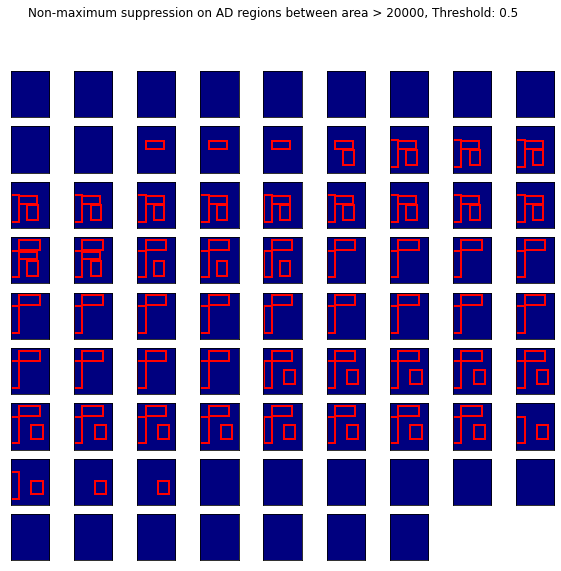

In [29]:
# Plot bbox for AD
ad_interesting, fig = segmentation.interesting_bbox(ad_bboxes[ad_bboxes['score']>0.5],th=0.0)
fig.suptitle("Non-maximum suppression on AD regions between area > 20000, Threshold: 0.5")
plt.show()

In [30]:
ad_interesting

tensor([[34., 48., 55., 79., 14., 32.],
        [ 0., 27., 17., 82., 15., 64.],
        [17., 29., 54., 45., 11., 29.],
        [42., 45., 65., 73., 49., 66.],
        [17.,  5., 59., 26., 27., 62.]])

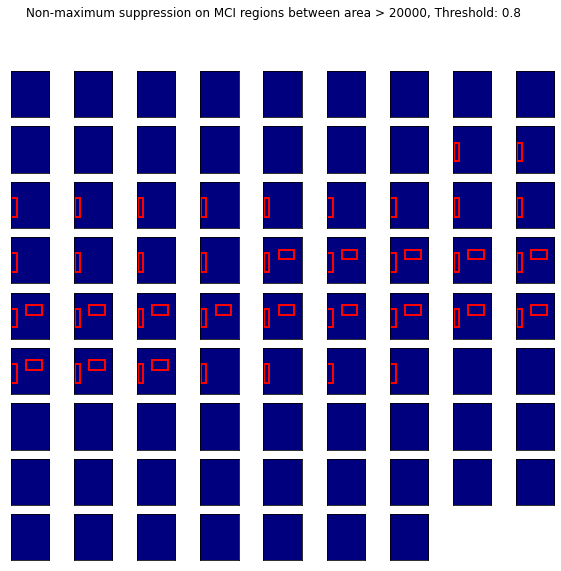

In [31]:
# Plot bbox for MCI
mci_interesting, fig = segmentation.interesting_bbox(mci_bboxes[mci_bboxes['score']>0.7], th=0.0)
fig.suptitle("Non-maximum suppression on MCI regions between area > 20000, Threshold: 0.8")
plt.show()

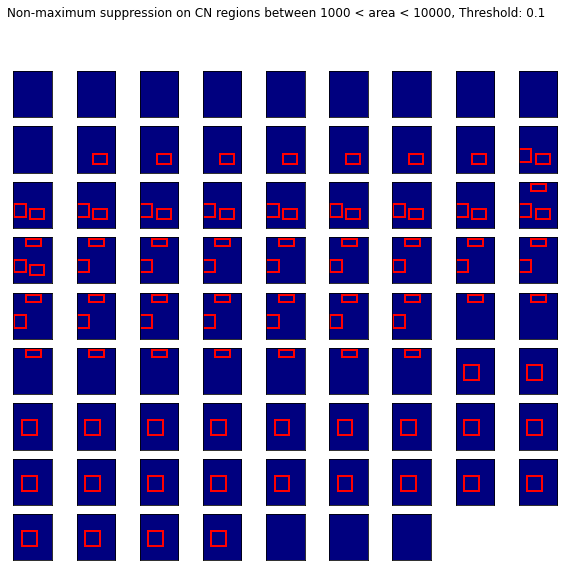

In [32]:
# Plot bbox for CN
#cn_interesting,fig = segmentation.plot_interesting_bbox(cn_bboxes[(cn_bboxes['bbox_area'] <10000) & (cn_bboxes['bbox_area'] >1000)], th=0.1)
cn_interesting,fig = segmentation.interesting_bbox(cn_bboxes[cn_bboxes['score']>0], th=0.0)

fig.suptitle("Non-maximum suppression on CN regions between 1000 < area < 10000, Threshold: 0.1")
plt.show()

In [33]:
cn_interesting

tensor([[ 0., 46., 25., 72., 17., 43.],
        [34., 56., 63., 77., 10., 28.],
        [25.,  4., 56., 18., 26., 52.],
        [17., 34., 47., 65., 52., 76.]])

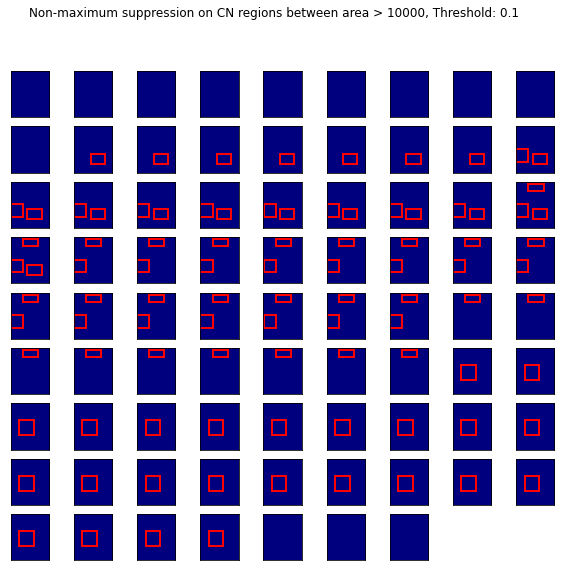

In [43]:
# Plot bbox for CN with another condition
cn_interesting2,fig = segmentation.interesting_bbox(cn_bboxes[cn_bboxes['score']>0.1], th=0.0)
fig.suptitle("Non-maximum suppression on CN regions between area > 10000, Threshold: 0.1")
plt.show()

In [44]:
def find_interesting_from_df(df_data, interesting_data):
    new_rows = df_data.apply(lambda row: row if list(row.bbox) in interesting_data.int().tolist() else 0, axis=1)
    return new_rows[new_rows['bbox'] != 0]

# Number of total boxes
print(ad_bboxes.shape[0])
print(mci_bboxes.shape[0])
print(cn_bboxes.shape[0])

44
37
23


In [45]:
find_interesting_from_df(ad_bboxes, ad_interesting)

Image_class             image  patient_class  observe_class  \
1047           44  AD_ADNI_2439.nii              2              2   
1048           44  AD_ADNI_2439.nii              2              2   
479            17  AD_ADNI_2653.nii              2              2   
95              2  AD_ADNI_2565.nii              2              2   
646            26  AD_ADNI_2482.nii              2              2   

      probability_class  bbox_area  mean_intensity                      bbox  \
1047                  1      11718      208.843340  [34, 48, 55, 79, 14, 32]   
1048                  1      45815      207.734166   [0, 27, 17, 82, 15, 64]   
479                   1      10656      203.633383  [17, 29, 54, 45, 11, 29]   
95                    1      10948      186.143381  [42, 45, 65, 73, 49, 66]   
646                   1      30870      191.544752   [17, 5, 59, 26, 27, 62]   

      upper_bound  lower_bound use_quantile_bounds     score  bbox_count  
1047        203.0        152.0                True  0.886373          36  
1048        203.0        152.0                True  0.828864          36  
479         200.0        156.0                True  0.825407          20  
95          178.0         75.0                True  0.707234          35  
646         181.0        133.0                True  0.675453          25

In [46]:
find_interesting_from_df(mci_bboxes, mci_interesting)

Image_class              image  patient_class  observe_class  \
1853           88  MCI_ADNI_1550.nii              1              1   
2055           97  MCI_ADNI_1668.nii              1              1   

      probability_class  bbox_area  mean_intensity                      bbox  \
1853                  1      15048      218.018072   [1, 33, 12, 71, 16, 52]   
2055                  1      10880      200.416993  [31, 25, 63, 45, 31, 48]   

      upper_bound  lower_bound use_quantile_bounds     score  bbox_count  
1853        211.0        166.0                True  0.844084          32  
2055        191.0         90.0                True  0.744662          14

In [47]:
find_interesting_from_df(cn_bboxes, cn_interesting)

Image_class             image  patient_class  observe_class  \
3074          135  CN_ADNI_0466.nii              0              0   
3598          153  CN_ADNI_0480.nii              0              0   
3611          153  CN_ADNI_0480.nii              0              0   
3630          153  CN_ADNI_0480.nii              0              0   

      probability_class  bbox_area  mean_intensity                      bbox  \
3074                  1      16900      194.041176   [0, 46, 25, 72, 17, 43]   
3598                  1      10962      194.061178  [34, 56, 63, 77, 10, 28]   
3611                  1      11284      189.697102   [25, 4, 56, 18, 26, 52]   
3630                  1      22320      190.961939  [17, 34, 47, 65, 52, 76]   

      upper_bound  lower_bound use_quantile_bounds     score  bbox_count  
3074        188.0        147.0                True  0.840704          18  
3598        182.0        134.0                True  0.754667          40  
3611        182.0        134.0                True  0.754123          40  
3630        182.0        134.0                True  0.735510          40

In [48]:
print(f'AD: \n{ad_interesting.int()}\nMCI: \n{mci_interesting.int()}\nCN: \n{cn_interesting.int()}')

AD: 
tensor([[34, 48, 55, 79, 14, 32],
        [ 0, 27, 17, 82, 15, 64],
        [17, 29, 54, 45, 11, 29],
        [42, 45, 65, 73, 49, 66],
        [17,  5, 59, 26, 27, 62]], dtype=torch.int32)
MCI: 
tensor([[ 1, 33, 12, 71, 16, 52],
        [31, 25, 63, 45, 31, 48]], dtype=torch.int32)
CN: 
tensor([[ 0, 46, 25, 72, 17, 43],
        [34, 56, 63, 77, 10, 28],
        [25,  4, 56, 18, 26, 52],
        [17, 34, 47, 65, 52, 76]], dtype=torch.int32)


In [49]:
# Create list of bbox that can be loaded.
merge_interesting_boxes = np.stack([*ad_interesting,*mci_interesting,*cn_interesting,*cn_interesting2])
merge_interesting_boxes

array([[34., 48., 55., 79., 14., 32.],
       [ 0., 27., 17., 82., 15., 64.],
       [17., 29., 54., 45., 11., 29.],
       [42., 45., 65., 73., 49., 66.],
       [17.,  5., 59., 26., 27., 62.],
       [ 1., 33., 12., 71., 16., 52.],
       [31., 25., 63., 45., 31., 48.],
       [ 0., 46., 25., 72., 17., 43.],
       [34., 56., 63., 77., 10., 28.],
       [25.,  4., 56., 18., 26., 52.],
       [17., 34., 47., 65., 52., 76.],
       [ 0., 46., 25., 72., 17., 43.],
       [34., 56., 63., 77., 10., 28.],
       [25.,  4., 56., 18., 26., 52.],
       [17., 34., 47., 65., 52., 76.]], dtype=float32)

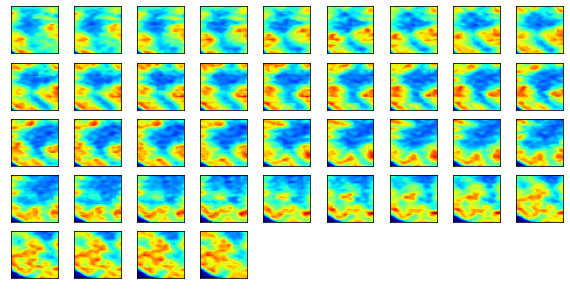

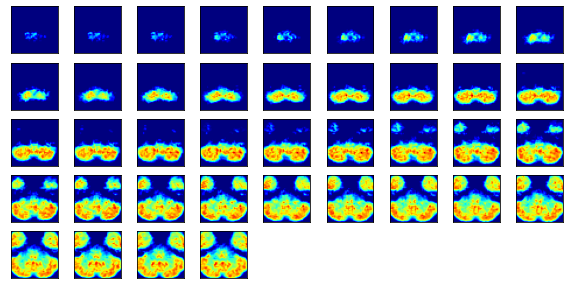

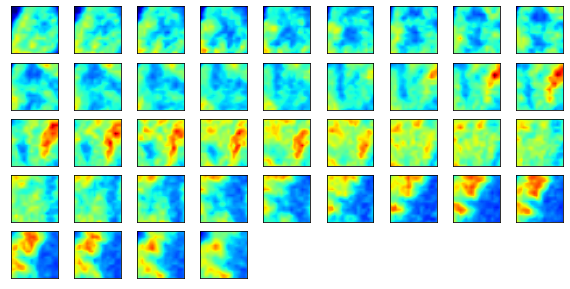

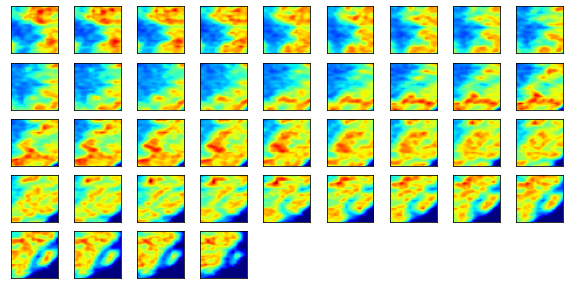

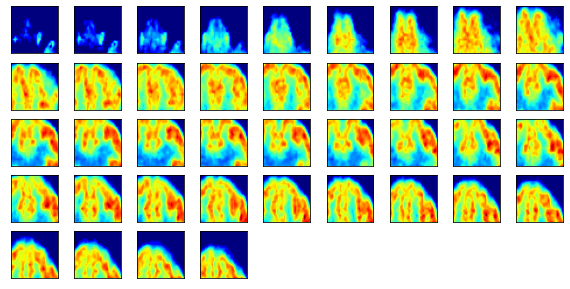

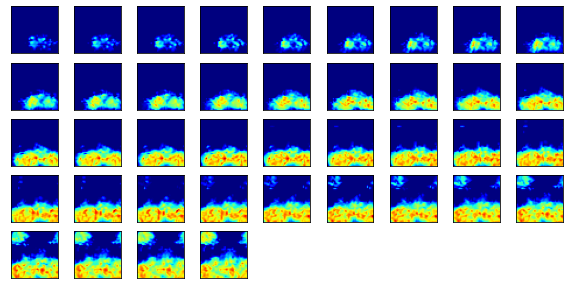

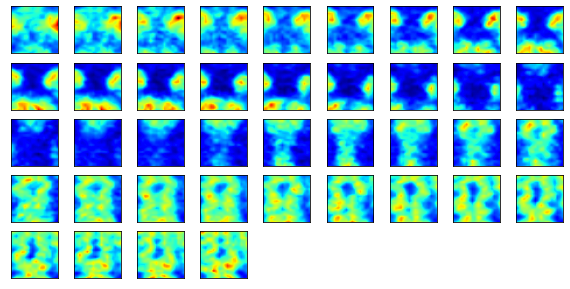

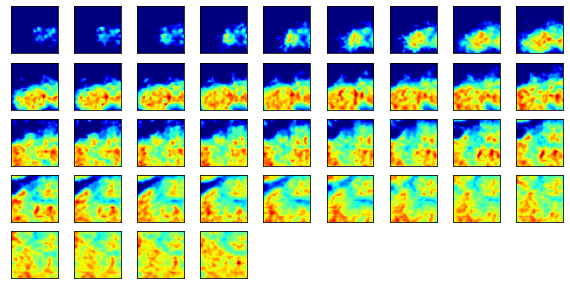

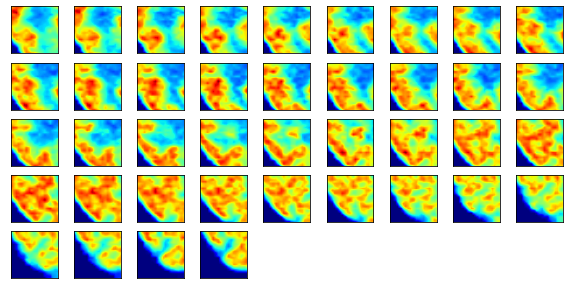

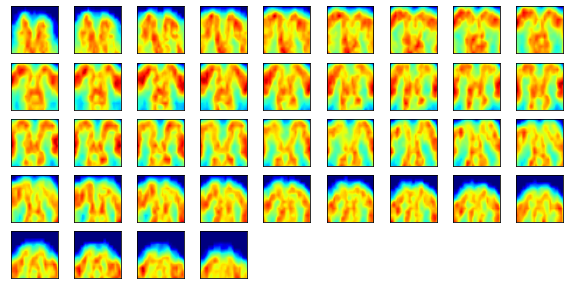

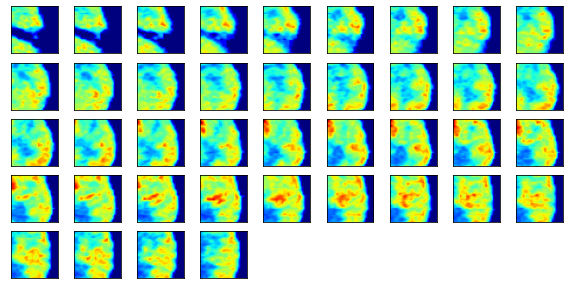

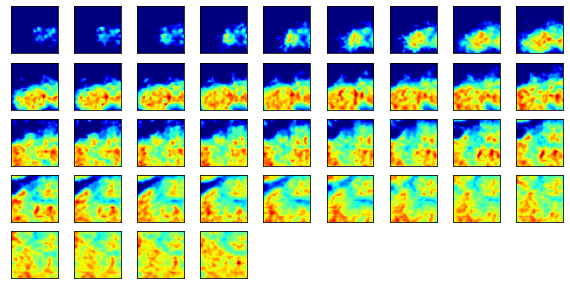

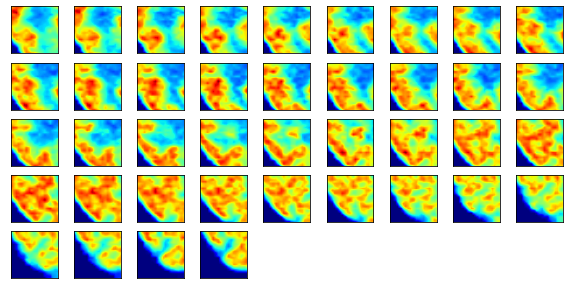

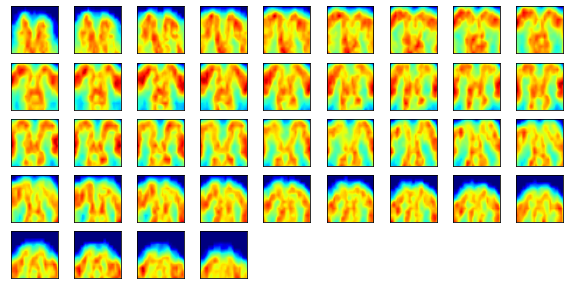

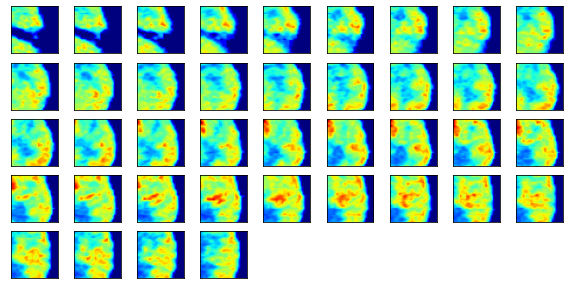

In [41]:
# Roi extraction
segmentation.roi_align(test_image, merge_interesting_boxes, displayed=True);

In [42]:
""" https://www.analyticsvidsort_index/blog/2020/08/selecting-the-right-bounding-box-using-non-max-suppression-with-implementation/
Step 1: Select the box with highest objectiveness score [Replace with intensity?] - Calculate with nms (package availible in segmentation)
Step 2: Then, compare the overlap (intersection over union) of this box with other boxes 
Step 3: Remove the bounding boxes with overlap (intersection over union) >50%
Step 4: Then, move to the next highest objectiveness score
Step 5: Finally, repeat steps 2-4
"""

' https://www.analyticsvidsort_index/blog/2020/08/selecting-the-right-bounding-box-using-non-max-suppression-with-implementation/\nStep 1: Select the box with highest objectiveness score [Replace with intensity?] - Calculate with nms (package availible in segmentation)\nStep 2: Then, compare the overlap (intersection over union) of this box with other boxes \nStep 3: Remove the bounding boxes with overlap (intersection over union) >50%\nStep 4: Then, move to the next highest objectiveness score\nStep 5: Finally, repeat steps 2-4\n'